<a href="https://colab.research.google.com/github/sammyon7/VisualizeYourData/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import sklearn
import sklearn.datasets
import sklearn.linear_model
from sklearn.datasets import make_classification

In [5]:
np.random.seed(1)
X, Y = make_classification(n_samples=400, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)

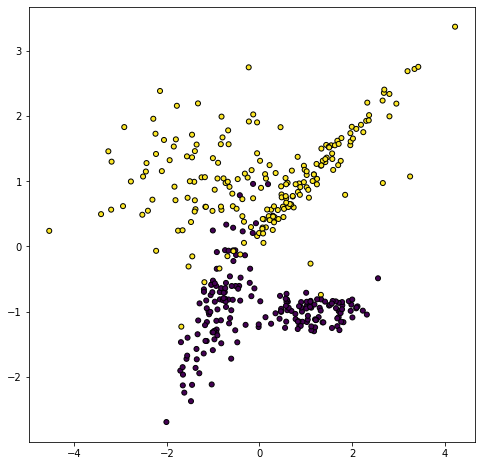

In [7]:
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
            s=25, edgecolor='k')
plt.show()

In [9]:
def initialize_network(n_x, n_y):
    W = np.random.randn(n_y,n_x)
    b = np.zeros((n_y,1))
    assert (W.shape == (n_y, n_x))
    assert (b.shape == (n_y, 1))
    network = {"W": W,
               "b": b}
    return network

def sigmoid(raw):
    s = 1 / (1+np.exp(-raw))
    return s

def forward_propagation(X, network):
    product = np.dot(network['W'],X)
    linA = np.add(product, network['b'])
    A = sigmoid(linA)
    assert(A.shape == (1, X.shape[1]))
    activations = {"linA": linA,
             "A": A}
    
    return A, activations



In [10]:
def evaluate(A, Y):
    ##−∑(Y*log(A)+(1−Y)*log(1−A))
    cost = -np.sum(np.add(np.dot(Y,np.log(A.T)),np.dot(1-Y,np.log(1-A.T))))
    cost = np.squeeze(cost)     
    
    assert(isinstance(cost, float))
    
    return cost

In [11]:
UT_network = initialize_network(2,1)

UT_A, UT_activations = forward_propagation(X.T, UT_network)
UT_Y = np.reshape(Y, (400,1))
UT_cost = evaluate(UT_A, UT_Y.T)

print("Cost value " + str(UT_cost))

Cost value 348.4385161329101


In [13]:
def backward_propagation(activations, X, Y):
    A = activations['A'] 
    n_samples = X.shape[1]
    ddlinA = A - Y
    ddW = np.dot(ddlinA,X.T) / n_samples
    ddb = np.sum(ddlinA,axis=1,keepdims=True) / n_samples
    assert(ddlinA.shape == (1, X.shape[1]))
    assert(ddW.shape == (Y.shape[0], X.shape[0]))
    assert(ddb.shape == (Y.shape[0], 1))
    gradients = {"ddW": ddW,
             "ddb": ddb}
    
    return gradients

UT_gradients = backward_propagation(UT_activations, X.T, UT_Y.T)
print("Gradient values " + str(UT_gradients))

Gradient values {'ddW': array([[ 0.19979757, -0.54888321]]), 'ddb': array([[0.00235057]])}



  Updates network using the gradient descent update rule given above
    
Arguments:
  * network -> python dictionary containing your network 
  * gradients -> python dictionary containing your gradients 

Returns:
  * network -> python dictionary containing your updated network 

In [14]:
def learn(network, gradients, learning_rate):
    W = network['W']
    b = network['b']
    ddW = gradients['ddW']
    ddb = gradients['ddb']
    W -= np.dot(ddW,learning_rate) 
    b -= np.dot(ddb,learning_rate)
    
    assert(W.shape == ddW.shape)
    assert(b.shape == ddb.shape)
    
    network = {"W": W,
              "b": b}
    
    return network

print("Old Network values " + str(UT_network))
UT_network = learn(UT_network, UT_gradients, learning_rate = 1.2)
print("New Network values " + str(UT_network))

Old Network values {'W': array([[ 0.4773024 , -0.24006957]]), 'b': array([[0.]])}
New Network values {'W': array([[0.23754532, 0.41859028]]), 'b': array([[-0.00282069]])}


Arguments:
* X -- dataset of shape (2, number of examples)
* Y -- labels of shape (1, number of examples)

* num_iterations -- Number of iterations in gradient descent loop
* print_cost -- if True, print the cost every 1000 iterations
    
Returns:
* network -- network learnt by the model. They can then be used to predict.

Cost after iteration 0: 148.788941
Cost after iteration 1000: 60.123992
Cost after iteration 2000: 60.123992
Cost after iteration 3000: 60.123992
Cost after iteration 4000: 60.123992
Cost after iteration 5000: 60.123992
Cost after iteration 6000: 60.123992
Cost after iteration 7000: 60.123992
Cost after iteration 8000: 60.123992
Cost after iteration 9000: 60.123992


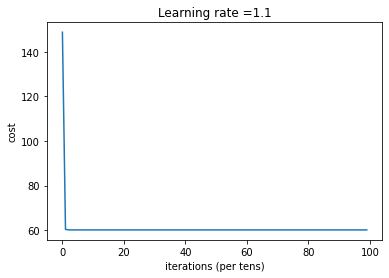

<Figure size 432x288 with 0 Axes>

In [17]:
def model(X, Y, num_iterations = 100, learning_rate=1.1, print_cost=False):
    n_x = X.shape[0]
    n_y = Y.shape[0] 
    costs = []

    network = initialize_network(n_x,n_y)
    W = network['W']
    b = network['b']
    for i in range(0, num_iterations):
        A,activations = forward_propagation(X,network)
        cost = evaluate(A,Y)
        gradients = backward_propagation(activations,X,Y)
        network = learn(network,gradients,learning_rate)
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate)) 
    plt.show()
    plt.clf()
    return network

Y = np.reshape(Y, (400,1))
network = model(X.T, Y.T, num_iterations = 10000, learning_rate = 1.1, print_cost=True)

Using the learned network, predicts a class for each example in X<br>
Arguments:
* network -- python dictionary containing your network 
* X -- input data of size (n_x, n_samples)
    
Returns
* predictions -- vector of predictions of our model (red: 0 / blue: 1)

In [24]:
def predict(network, X):
    A, activations = forward_propagation(X,network)
    predictions = np.where(A > 0.5,1,0)
    
    return predictions

predictions = predict(network, X.T)
print("Predictions " + str(predictions))
print("\n\n##########")
print ('Accuracy: %d' % float((np.dot(Y.T,predictions.T) + np.dot(1-Y.T,1-predictions.T))/float(Y.T.size)*100) + '%')

Predictions [[1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1
  1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0
  0 0 1 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0
  0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0
  0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1
  1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0
  1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0
  1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0
  1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1
  1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1
  0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0
  0 1 1 0]]


##########
Accuracy: 95%


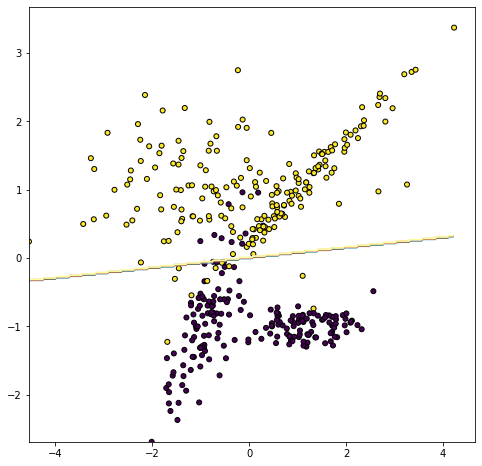

In [25]:
plt.figure(figsize=(8, 8))

Y = np.reshape(Y, (400,))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
            s=25, edgecolor='k')
h = .02 
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

predictions = predict(network,(np.c_[xx.ravel(), yy.ravel()].T))
predictions = predictions.reshape(xx.shape)
plt.contour(xx, yy, predictions, cmap=plt.cm.Paired)

plt.show()

Coded by Yehezk34